In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

## PartA

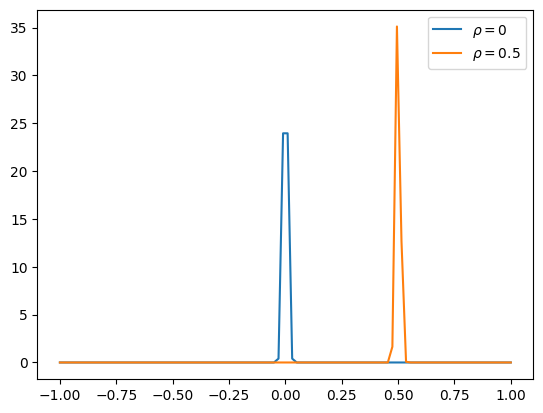

In [3]:
def distribution(rho: float, population_size: int):
    return sts.norm(rho, (1 - rho + 2 * rho**2) / population_size).pdf


x = np.linspace(-1, 1, 100)
plt.plot(x, distribution(0, 100)(x), label=r"$\rho=0$")
plt.plot(x, distribution(0.5, 100)(x), label=r"$\rho=0.5$")
plt.legend()
plt.savefig('../static/task3/distributions.png')

In [ ]:
## PartB

## PartC